In [118]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [119]:
#read brighton data from csv
brighton_df = pd.read_csv("data/brighton.csv",parse_dates=['datetime'])
brighton_df.head()

/var/folders/h9/ht4zpp_x2ld51gml9v3_lbnw0000gn/T/ipykernel_4080/702995117.py:2: DtypeWarning: Columns (1,2,3,4,5,7,8,9,10,11,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  brighton_df = pd.read_csv("data/brighton.csv",parse_dates=['datetime'])


,datetime,temp,dew,humidity,precip,precipprob,preciptype,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,solarradiation,solarenergy,uvindex
0,2013-09-22T00:00:00,16.6,16.2,97.99,0.0,0.0,NaN,0.0,0,7.6,258.0,1026.9,93.3,0.0,0.0,0.0
1,2013-09-22T01:00:00,16.6,16.3,97.95,0.018,100.0,rain,0.0,0,9.7,265.0,1026.9,96.6,0.0,0.0,0.0
2,2013-09-22T02:00:00,16.6,16.2,98.0,0.0,0.0,NaN,0.0,0,4.0,304.0,1027.1,96.4,0.0,0.0,0.0
3,2013-09-22T03:00:00,16.5,16.1,97.53,0.0,0.0,NaN,0.0,0,3.8,267.0,1027.2,100.0,0.0,0.0,0.0
4,2013-09-22T04:00:00,16.5,16.1,97.53,NaN,0.0,NaN,0.0,0,5.2,266.0,1027.2,100.0,0.0,0.0,0.0


In [120]:
print("Number of brighton samples: ",brighton_df.shape[0])

Number of brighton samples:  198853


In [121]:
#read colchester data from csv
colchester_df = pd.read_csv("data/colchester.csv",parse_dates=['datetime'])
colchester_df.head()

/var/folders/h9/ht4zpp_x2ld51gml9v3_lbnw0000gn/T/ipykernel_4080/1299395937.py:2: DtypeWarning: Columns (1,2,3,4,5,7,8,9,10,11,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  colchester_df = pd.read_csv("data/colchester.csv",parse_dates=['datetime'])


,datetime,temp,dew,humidity,precip,precipprob,preciptype,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,solarradiation,solarenergy,uvindex
0,2006-06-19T00:00:00,17.9,13.3,74.46,0.0,0.0,NaN,0.0,0.0,13.3,198.0,1008.9,90.0,NaN,NaN,NaN
1,2006-06-19T01:00:00,17.5,13.2,75.98,0.0,0.0,NaN,0.0,0.0,14.1,206.0,1008.9,90.0,NaN,NaN,NaN
2,2006-06-19T02:00:00,16.8,12.5,75.81,0.0,0.0,NaN,0.0,0.0,13.9,210.0,1008.0,90.0,NaN,NaN,NaN
3,2006-06-19T03:00:00,16.0,11.4,74.35,0.0,0.0,NaN,0.0,0.0,12.5,221.0,1007.9,90.0,NaN,NaN,NaN
4,2006-06-19T04:00:00,15.2,9.7,69.46,0.0,0.0,NaN,0.0,0.0,13.8,214.0,1007.9,26.6,NaN,NaN,NaN


In [122]:
print("Number of colchester samples: ",colchester_df.shape[0])

Number of colchester samples:  295846


In [123]:
#EDA for brighton
print("colchester data types: ",colchester_df.dtypes)

colchester data types:  datetime            object
temp                object
dew                 object
humidity            object
precip              object
precipprob          object
preciptype          object
snow                object
snowdepth           object
windspeed           object
winddir             object
sealevelpressure    object
cloudcover          object
solarradiation      object
solarenergy         object
uvindex             object
dtype: object


In [124]:
#bring colums that contain letters in data and show what strings are those
for column in brighton_df.columns:
    #if an element of the unique list contains any letter print it
    if column != 'datetime':
        words=[element for element in brighton_df[column].unique() if any(char.isalpha() for char in str(element))]
        print("Column: ",column,"contains: ", words)


Column:  temp contains:  [nan, 'temp']
Column:  dew contains:  [nan, 'dew']
Column:  humidity contains:  ['humidity', nan]
Column:  precip contains:  [nan, 'precip']
Column:  precipprob contains:  [nan, 'precipprob']
Column:  preciptype contains:  [nan, 'rain', 'preciptype', 'rain,snow', 'snow']
Column:  snow contains:  [nan, 'snow']
Column:  snowdepth contains:  ['snowdepth', nan]
Column:  windspeed contains:  [nan, 'windspeed']
Column:  winddir contains:  [nan, 'winddir']
Column:  sealevelpressure contains:  ['sealevelpressure', nan]
Column:  cloudcover contains:  [nan, 'cloudcover']
Column:  solarradiation contains:  [nan, 'solarradiation']
Column:  solarenergy contains:  [nan, 'solarenergy']
Column:  uvindex contains:  [nan, 'uvindex']


In [125]:
#print the unique rows that contains the word "temp" in the column "temp"

temp_rows = brighton_df[brighton_df['temp'].str.contains("temp", na=False)]
unique_temp_rows = temp_rows.drop_duplicates()
print(unique_temp_rows)


     datetime  temp  dew  humidity  precip  precipprob  preciptype  snow  \
961  datetime  temp  dew  humidity  precip  precipprob  preciptype  snow   

     snowdepth  windspeed  winddir  sealevelpressure  cloudcover  \
961  snowdepth  windspeed  winddir  sealevelpressure  cloudcover   

     solarradiation  solarenergy  uvindex  
961  solarradiation  solarenergy  uvindex  


In [126]:
#drop row from brighton_df that contains the word "temp" in the column "temp"
brighton_df = brighton_df[~brighton_df['temp'].str.contains("temp", na=False)]

In [127]:
#change datatypes of columns all columns to float except datetime they are in format "5.7",...
brighton_df = brighton_df.apply(pd.to_numeric, errors='ignore')

In [128]:
print("Brighton data types: ",brighton_df.dtypes)

Brighton data types:  datetime             object
temp                float64
dew                 float64
humidity            float64
precip              float64
precipprob          float64
preciptype           object
snow                float64
snowdepth           float64
windspeed           float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
solarradiation      float64
solarenergy         float64
uvindex             float64
dtype: object


In [129]:

print("Brighton missing values: ",brighton_df.isnull().sum())

Brighton missing values:  datetime                 0
temp                   408
dew                    448
humidity               444
precip                 459
precipprob             468
preciptype          180665
snow                 56320
snowdepth            57311
windspeed              428
winddir                455
sealevelpressure       867
cloudcover             463
solarradiation         522
solarenergy            585
uvindex                578
dtype: int64


In [130]:
#show rows with null temperature
brighton_df[brighton_df['temp'].isnull()]


,datetime,temp,dew,humidity,precip,precipprob,preciptype,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,solarradiation,solarenergy,uvindex
624,2013-10-18T00:00:00,NaN,10.8,98.46,0.000,0.0,NaN,0.0,0.0,1.4,236.0,1016.8,92.1,0.0,0.0,0.0
2077,2010-11-23T10:00:00,NaN,4.1,88.50,0.000,0.0,NaN,0.0,0.0,7.7,329.0,1011.9,34.9,176.0,0.6,2.0
2124,2010-11-25T09:00:00,NaN,-1.0,86.84,0.000,0.0,NaN,0.0,0.0,16.0,349.0,1008.0,90.0,101.4,0.4,1.0
3653,2010-11-09T00:00:00,NaN,6.9,96.06,5.314,100.0,rain,0.0,0.0,13.9,80.0,966.9,53.4,0.0,0.0,0.0
3686,2010-11-10T09:00:00,NaN,0.7,80.39,0.000,0.0,NaN,0.0,0.0,27.3,353.0,996.2,9.7,210.3,0.8,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196912,2010-06-09T07:00:00,NaN,13.4,99.60,0.006,100.0,rain,0.0,0.0,2.2,46.0,1003.5,42.2,148.6,0.5,1.0
197385,2011-01-14T22:00:00,NaN,7.3,95.38,0.000,0.0,NaN,0.0,0.0,15.7,254.0,1015.5,65.8,0.0,0.0,0.0
197627,2011-01-25T00:00:00,NaN,0.9,95.28,0.018,100.0,"rain,snow",0.0,0.0,7.5,278.0,1025.5,18.6,0.0,0.0,0.0
197930,2014-01-21T13:00:00,NaN,5.4,83.96,0.000,0.0,NaN,NaN,NaN,18.4,218.0,1010.4,57.4,257.9,0.9,3.0


In [131]:
# check id there are duplicated rows
duplicated_rows = brighton_df[brighton_df.duplicated()]
print("Duplicated rows: ",duplicated_rows)

Duplicated rows:                     datetime  temp  dew  humidity  precip  precipprob  \
3845                      0   1.0  2.0      3.00     4.0         5.0   
4807                      0   1.0  2.0      3.00     4.0         5.0   
5769                      0   1.0  2.0      3.00     4.0         5.0   
6731                      0   1.0  2.0      3.00     4.0         5.0   
8654                      0   1.0  2.0      3.00     4.0         5.0   
...                     ...   ...  ...       ...     ...         ...   
198848  2014-02-28T19:00:00   4.8  3.2     89.80     0.0         0.0   
198849  2014-02-28T20:00:00   4.4  3.1     91.76     0.0         0.0   
198850  2014-02-28T21:00:00   4.4  3.2     92.34     0.0         0.0   
198851  2014-02-28T22:00:00   4.3  3.1     91.76     0.0         0.0   
198852  2014-02-28T23:00:00   4.3  3.1     91.86     0.0         0.0   

       preciptype  snow  snowdepth  windspeed  winddir  sealevelpressure  \
3845            6   7.0        8.0       

In [132]:
#remove rows with datetime = 0
brighton_df = brighton_df[brighton_df['datetime'] != '0']
print("Number of brighton samples: ",brighton_df.shape[0])

Number of brighton samples:  198648


In [133]:
#order data by datetime and use datetime as index
brighton_df = brighton_df.sort_values(by='datetime')
brighton_df = brighton_df.set_index('datetime')
brighton_df.head()

,temp,dew,humidity,precip,precipprob,preciptype,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,solarradiation,solarenergy,uvindex
datetime,,,,,,,,,,,,,,,
2010-01-01T00:00:00,1.9,-0.5,84.25,0.417,100.0,"rain,snow",0.0,0.0,19.4,11.0,999.9,62.2,0.0,0.0,0.0
2010-01-01T01:00:00,1.9,-0.5,83.90,0.000,0.0,NaN,0.0,0.0,21.8,19.0,999.8,22.4,0.0,0.0,0.0
2010-01-01T02:00:00,1.4,-0.7,85.76,0.000,0.0,NaN,0.0,0.0,17.7,10.0,1000.0,38.0,0.0,0.0,0.0
2010-01-01T03:00:00,1.4,-0.7,85.69,0.000,0.0,NaN,0.0,0.0,18.0,11.0,1000.2,66.7,0.0,0.0,0.0
2010-01-01T04:00:00,1.3,-0.8,85.72,0.000,0.0,NaN,0.0,0.0,17.4,10.0,1000.5,62.8,0.0,0.0,0.0


In [134]:
# see values of categeorical column preciptype
print("PrecipType values: ",brighton_df['preciptype'].unique())

PrecipType values:  ['rain,snow' nan 'rain' 'snow']


In [135]:
# create dummy variables for categorical column preciptype and add them to the dataframe for the value "rain,snow" separate them into two columns(so at the end i will just have column snow and column rain)
# split the combined categories into separate categories
brighton_df['preciptype_rain'] = brighton_df['preciptype'].str.contains('rain')
brighton_df['preciptype_snow'] = brighton_df['preciptype'].str.contains('snow')

In [136]:
brighton_df.head()

,temp,dew,humidity,precip,precipprob,preciptype,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,solarradiation,solarenergy,uvindex,preciptype_rain,preciptype_snow
datetime,,,,,,,,,,,,,,,,,
2010-01-01T00:00:00,1.9,-0.5,84.25,0.417,100.0,"rain,snow",0.0,0.0,19.4,11.0,999.9,62.2,0.0,0.0,0.0,True,True
2010-01-01T01:00:00,1.9,-0.5,83.90,0.000,0.0,NaN,0.0,0.0,21.8,19.0,999.8,22.4,0.0,0.0,0.0,NaN,NaN
2010-01-01T02:00:00,1.4,-0.7,85.76,0.000,0.0,NaN,0.0,0.0,17.7,10.0,1000.0,38.0,0.0,0.0,0.0,NaN,NaN
2010-01-01T03:00:00,1.4,-0.7,85.69,0.000,0.0,NaN,0.0,0.0,18.0,11.0,1000.2,66.7,0.0,0.0,0.0,NaN,NaN
2010-01-01T04:00:00,1.3,-0.8,85.72,0.000,0.0,NaN,0.0,0.0,17.4,10.0,1000.5,62.8,0.0,0.0,0.0,NaN,NaN


In [137]:
#fillna for preciptype_rain and preciptype_snow witht the value False
brighton_df['preciptype_rain'] = brighton_df['preciptype_rain'].fillna(False)  
brighton_df['preciptype_snow'] = brighton_df['preciptype_snow'].fillna(False)
brighton_df.head()

,temp,dew,humidity,precip,precipprob,preciptype,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,solarradiation,solarenergy,uvindex,preciptype_rain,preciptype_snow
datetime,,,,,,,,,,,,,,,,,
2010-01-01T00:00:00,1.9,-0.5,84.25,0.417,100.0,"rain,snow",0.0,0.0,19.4,11.0,999.9,62.2,0.0,0.0,0.0,True,True
2010-01-01T01:00:00,1.9,-0.5,83.90,0.000,0.0,NaN,0.0,0.0,21.8,19.0,999.8,22.4,0.0,0.0,0.0,False,False
2010-01-01T02:00:00,1.4,-0.7,85.76,0.000,0.0,NaN,0.0,0.0,17.7,10.0,1000.0,38.0,0.0,0.0,0.0,False,False
2010-01-01T03:00:00,1.4,-0.7,85.69,0.000,0.0,NaN,0.0,0.0,18.0,11.0,1000.2,66.7,0.0,0.0,0.0,False,False
2010-01-01T04:00:00,1.3,-0.8,85.72,0.000,0.0,NaN,0.0,0.0,17.4,10.0,1000.5,62.8,0.0,0.0,0.0,False,False


In [138]:
# replace true and false with 1 and 0
brighton_df['preciptype_rain'] = brighton_df['preciptype_rain'].astype(int)
brighton_df['preciptype_snow'] = brighton_df['preciptype_snow'].astype(int)

In [139]:
#remove column preciptype
brighton_df = brighton_df.drop(columns=['preciptype'])

In [140]:
brighton_df.describe()

,temp,dew,humidity,precip,precipprob,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,solarradiation,solarenergy,uvindex,preciptype_rain,preciptype_snow
count,198240.000000,198200.000000,198204.000000,198189.000000,198180.000000,142328.000000,141337.000000,198220.000000,198193.000000,197781.000000,198185.000000,198126.000000,198063.000000,198070.000000,198648.000000,198648.000000
mean,11.189423,8.126471,82.627605,0.081009,8.723887,0.000480,0.029867,15.947152,195.515449,1015.592398,60.456294,142.212693,0.511529,1.405145,0.090270,0.002915
std,5.657156,5.148714,12.611281,0.663970,28.218550,0.038401,0.476362,8.875240,106.503811,10.328337,31.913867,223.696360,0.806108,2.254997,0.286569,0.053909
min,-9.100000,-11.600000,24.340000,0.000000,0.000000,0.000000,0.000000,0.000000,0.700000,955.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.300000,4.600000,75.190000,0.000000,0.000000,0.000000,0.000000,9.400000,110.000000,1009.800000,35.400000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11.200000,8.500000,85.430000,0.000000,0.000000,0.000000,0.000000,14.400000,222.000000,1016.400000,67.800000,10.200000,0.000000,0.000000,0.000000,0.000000
75%,15.400000,12.100000,92.640000,0.000000,0.000000,0.000000,0.000000,21.400000,267.000000,1022.500000,89.300000,210.400000,0.800000,2.000000,0.000000,0.000000
max,33.300000,20.200000,100.000000,32.385000,100.000000,7.870000,96.000000,72.200000,360.000000,1049.300000,100.000000,1150.000000,4.100000,10.000000,1.000000,1.000000


In [141]:
#do the same for colchester
print("Colchester data types: ",colchester_df.dtypes)

Colchester data types:  datetime            object
temp                object
dew                 object
humidity            object
precip              object
precipprob          object
preciptype          object
snow                object
snowdepth           object
windspeed           object
winddir             object
sealevelpressure    object
cloudcover          object
solarradiation      object
solarenergy         object
uvindex             object
dtype: object


In [142]:
#bring colums that contain letters in data and show what strings are those
for column in colchester_df.columns:
    #if an element of the unique list contains any letter print it
    if column != 'datetime':
        words=[element for element in colchester_df[column].unique() if any(char.isalpha() for char in str(element))]
        print("Column: ",column,"contains: ", words)


Column:  temp contains:  [nan, 'temp']
Column:  dew contains:  [nan, 'dew']
Column:  humidity contains:  [nan, 'humidity']
Column:  precip contains:  [nan, 'precip']
Column:  precipprob contains:  [nan, 'precipprob']
Column:  preciptype contains:  [nan, 'rain', 'preciptype', 'rain,snow', 'snow']
Column:  snow contains:  [nan, 'snow']
Column:  snowdepth contains:  [nan, 'snowdepth']
Column:  windspeed contains:  [nan, 'windspeed']
Column:  winddir contains:  [nan, 'winddir']
Column:  sealevelpressure contains:  [nan, 'sealevelpressure']
Column:  cloudcover contains:  [nan, 'cloudcover']
Column:  solarradiation contains:  [nan, 'solarradiation']
Column:  solarenergy contains:  [nan, 'solarenergy', 'uvindex']
Column:  uvindex contains:  [nan, 'uvindex']


In [143]:
#print the unique rows that contains the word "temp" in the column "temp"

temp_rows = colchester_df[colchester_df['temp'].str.contains("temp", na=False)]
unique_temp_rows = temp_rows.drop_duplicates()
print(unique_temp_rows)


        datetime  temp  dew  humidity  precip  precipprob  preciptype  snow  \
960     datetime  temp  dew  humidity  precip  precipprob  preciptype  snow   
177726  datetime  temp  dew  humidity  precip  precipprob  preciptype  snow   

        snowdepth  windspeed  winddir  sealevelpressure  cloudcover  \
960     snowdepth  windspeed  winddir  sealevelpressure  cloudcover   
177726  snowdepth  windspeed  winddir  sealevelpressure  cloudcover   

        solarradiation  solarenergy  uvindex  
960     solarradiation  solarenergy  uvindex  
177726  solarradiation      uvindex      NaN  


In [144]:
#drop row from brighton_df that contains the word "temp" in the column "temp"
colchester_df = colchester_df[~colchester_df['temp'].str.contains("temp", na=False)]


In [145]:
# see rows with preciptype == 6
colchester_df[colchester_df['preciptype']== "6"]


,datetime,temp,dew,humidity,precip,precipprob,preciptype,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,solarradiation,solarenergy,uvindex
3843,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
6726,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
9610,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
11532,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
13455,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291036,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
291998,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
292960,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
293922,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15


In [146]:
#remove rows with preciptype = 6
colchester_df = colchester_df[colchester_df['preciptype'] != "6"]

In [147]:
#change datatypes of columns all columns to float except datetime they are in format "5.7",...
colchester_df = colchester_df.apply(pd.to_numeric, errors='ignore')


In [148]:
print("Colchester data types: ",colchester_df.dtypes)


Colchester data types:  datetime             object
temp                float64
dew                 float64
humidity            float64
precip              float64
precipprob          float64
preciptype           object
snow                float64
snowdepth           float64
windspeed           float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
solarradiation      float64
solarenergy         float64
uvindex             float64
dtype: object


In [149]:
print("Colchester missing values: ",colchester_df.isnull().sum())


Colchester missing values:  datetime                 0
temp                   642
dew                    681
humidity               679
precip                 930
precipprob             683
preciptype          265257
snow                  1805
snowdepth             1891
windspeed              635
winddir                669
sealevelpressure     11813
cloudcover            4966
solarradiation      144948
solarenergy         144913
uvindex             144924
dtype: int64


In [150]:
# check id there are duplicated rows
duplicated_rows = colchester_df[colchester_df.duplicated()]
print("Duplicated rows: ",duplicated_rows)

Duplicated rows:                     datetime  temp   dew  humidity  precip  precipprob  \
24034   2006-06-19T00:00:00  17.9  13.3     74.46     0.0         0.0   
24035   2006-06-19T01:00:00  17.5  13.2     75.98     0.0         0.0   
24036   2006-06-19T02:00:00  16.8  12.5     75.81     0.0         0.0   
24037   2006-06-19T03:00:00  16.0  11.4     74.35     0.0         0.0   
24038   2006-06-19T04:00:00  15.2   9.7     69.46     0.0         0.0   
...                     ...   ...   ...       ...     ...         ...   
295841  2009-07-12T19:00:00  21.4  11.0     51.47     0.0         0.0   
295842  2009-07-12T20:00:00  20.4  10.6     53.54     0.0         0.0   
295843  2009-07-12T21:00:00  18.2  10.6     61.35     0.0         0.0   
295844  2009-07-12T22:00:00  16.5  11.6     73.08     0.0         0.0   
295845  2009-07-12T23:00:00  15.1  12.3     83.21     0.0         0.0   

       preciptype  snow  snowdepth  windspeed  winddir  sealevelpressure  \
24034         NaN   0.0      

In [151]:
#remove rows with datetime = 0
colchester_df = colchester_df[colchester_df['datetime'] != "0"]
print("Number of colchester samples: ",colchester_df.shape[0])

Number of colchester samples:  295540


In [152]:
# see values of categeorical column preciptype
print("PrecipType values: ",colchester_df['preciptype'].unique())


PrecipType values:  [nan 'rain' 'rain,snow' 'snow']


In [153]:
# create dummy variables for categorical column preciptype and add them to the dataframe for the value "rain,snow" separate them into two columns(so at the end i will just have column snow and column rain)
# split the combined categories into separate categories
colchester_df['preciptype_rain'] = colchester_df['preciptype'].str.contains('rain')
colchester_df['preciptype_snow'] = colchester_df['preciptype'].str.contains('snow')
colchester_df.head()


,datetime,temp,dew,humidity,precip,precipprob,preciptype,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,solarradiation,solarenergy,uvindex,preciptype_rain,preciptype_snow
0,2006-06-19T00:00:00,17.9,13.3,74.46,0.0,0.0,NaN,0.0,0.0,13.3,198.0,1008.9,90.0,NaN,NaN,NaN,NaN,NaN
1,2006-06-19T01:00:00,17.5,13.2,75.98,0.0,0.0,NaN,0.0,0.0,14.1,206.0,1008.9,90.0,NaN,NaN,NaN,NaN,NaN
2,2006-06-19T02:00:00,16.8,12.5,75.81,0.0,0.0,NaN,0.0,0.0,13.9,210.0,1008.0,90.0,NaN,NaN,NaN,NaN,NaN
3,2006-06-19T03:00:00,16.0,11.4,74.35,0.0,0.0,NaN,0.0,0.0,12.5,221.0,1007.9,90.0,NaN,NaN,NaN,NaN,NaN
4,2006-06-19T04:00:00,15.2,9.7,69.46,0.0,0.0,NaN,0.0,0.0,13.8,214.0,1007.9,26.6,NaN,NaN,NaN,NaN,NaN


In [154]:
#fillna for preciptype_rain and preciptype_snow witht the value False
colchester_df['preciptype_rain'] = colchester_df['preciptype_rain'].fillna(False)  
colchester_df['preciptype_snow'] = colchester_df['preciptype_snow'].fillna(False)
colchester_df.head()

,datetime,temp,dew,humidity,precip,precipprob,preciptype,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,solarradiation,solarenergy,uvindex,preciptype_rain,preciptype_snow
0,2006-06-19T00:00:00,17.9,13.3,74.46,0.0,0.0,NaN,0.0,0.0,13.3,198.0,1008.9,90.0,NaN,NaN,NaN,False,False
1,2006-06-19T01:00:00,17.5,13.2,75.98,0.0,0.0,NaN,0.0,0.0,14.1,206.0,1008.9,90.0,NaN,NaN,NaN,False,False
2,2006-06-19T02:00:00,16.8,12.5,75.81,0.0,0.0,NaN,0.0,0.0,13.9,210.0,1008.0,90.0,NaN,NaN,NaN,False,False
3,2006-06-19T03:00:00,16.0,11.4,74.35,0.0,0.0,NaN,0.0,0.0,12.5,221.0,1007.9,90.0,NaN,NaN,NaN,False,False
4,2006-06-19T04:00:00,15.2,9.7,69.46,0.0,0.0,NaN,0.0,0.0,13.8,214.0,1007.9,26.6,NaN,NaN,NaN,False,False


In [155]:
# replace true and false with 1 and 0
colchester_df['preciptype_rain'] = colchester_df['preciptype_rain'].astype(int)
colchester_df['preciptype_snow'] = colchester_df['preciptype_snow'].astype(int)
#remove column preciptype
colchester_df = colchester_df.drop(columns=['preciptype'])

In [156]:
#order data by datetime and use datetime as index
colchester_df = colchester_df.sort_values(by='datetime')
colchester_df = colchester_df.set_index('datetime')
colchester_df.head()

,temp,dew,humidity,precip,precipprob,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,solarradiation,solarenergy,uvindex,preciptype_rain,preciptype_snow
datetime,,,,,,,,,,,,,,,,
2000-01-01T00:00:00,5.9,5.7,98.63,0.0,0.0,NaN,NaN,9.4,210.0,1020.6,NaN,NaN,NaN,NaN,0,0
2000-01-01T01:00:00,6.4,5.8,96.12,0.0,0.0,NaN,NaN,15.1,233.0,1020.4,100.0,NaN,NaN,NaN,0,0
2000-01-01T02:00:00,6.6,6.4,98.31,0.0,0.0,NaN,NaN,13.9,238.0,1020.5,100.0,NaN,NaN,NaN,0,0
2000-01-01T03:00:00,7.2,6.5,95.92,0.0,0.0,NaN,NaN,14.1,232.0,1020.5,100.0,NaN,NaN,NaN,0,0
2000-01-01T04:00:00,7.2,6.6,96.38,0.0,0.0,NaN,NaN,14.3,242.0,1020.4,100.0,NaN,NaN,NaN,0,0


In [157]:
colchester_df.describe()

,temp,dew,humidity,precip,precipprob,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,solarradiation,solarenergy,uvindex,preciptype_rain,preciptype_snow
count,294898.000000,294859.000000,294861.000000,294610.000000,294857.000000,293735.000000,293649.000000,294905.000000,294871.000000,283727.000000,290574.000000,150592.000000,150627.000000,150616.000000,295540.000000,295540.000000
mean,10.523529,7.177801,81.450240,0.067259,10.198220,0.001101,0.069311,15.924488,198.491215,1013.915533,59.354209,121.766552,0.437700,1.198053,0.102155,0.005045
std,6.098824,5.010905,14.171166,0.646345,30.254467,0.045465,0.644133,7.860463,95.579496,31.089555,31.856881,197.666381,0.712367,1.996388,0.302853,0.070849
min,-9.600000,-10.800000,22.430000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.100000,3.600000,73.230000,0.000000,0.000000,0.000000,0.000000,10.100000,127.000000,1008.300000,34.100000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10.400000,7.400000,85.360000,0.000000,0.000000,0.000000,0.000000,14.600000,218.000000,1015.600000,66.300000,8.600000,0.000000,0.000000,0.000000,0.000000
75%,14.900000,11.000000,92.610000,0.000000,0.000000,0.000000,0.000000,20.600000,267.000000,1022.000000,88.300000,169.000000,0.600000,2.000000,0.000000,0.000000
max,35.000000,21.500000,100.000000,84.324000,100.000000,9.100000,15.230000,74.700000,360.000000,1048.900000,100.000000,1054.000000,3.800000,10.000000,1.000000,1.000000


In [117]:
brighton_df.to_csv("data/brighton_cleaned.csv")
colchester_df.to_csv("data/colchester_cleaned.csv")

## Data Visualization

In [ ]:
# Set the index of 'brighton_df' to a DatetimeIndex
brighton_df.index = pd.to_datetime(brighton_df.index)


<Axes: xlabel='datetime'>

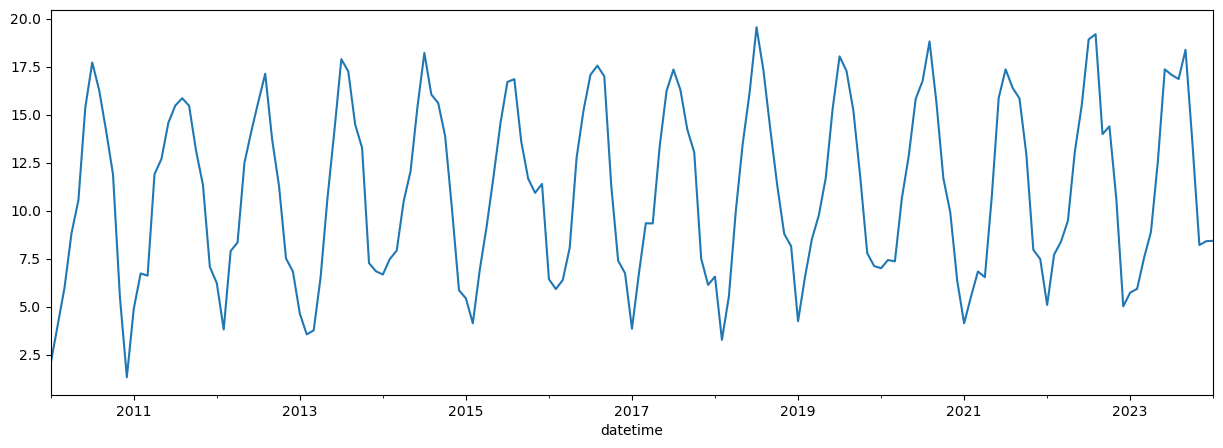

In [163]:

# Resample and plot the average temperature by month
brighton_df.resample('M').mean()['temp'].plot(figsize=(15, 5))

<Axes: xlabel='datetime'>

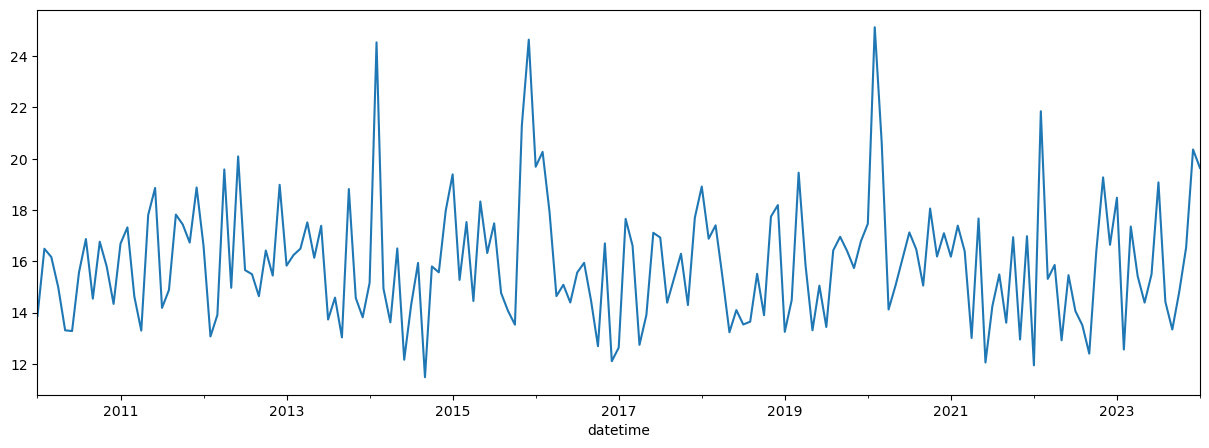

In [162]:
# plot the average windspeed by month and show months on x axis
brighton_df.resample('M').mean()['windspeed'].plot(figsize=(15, 5))


<Axes: xlabel='datetime'>

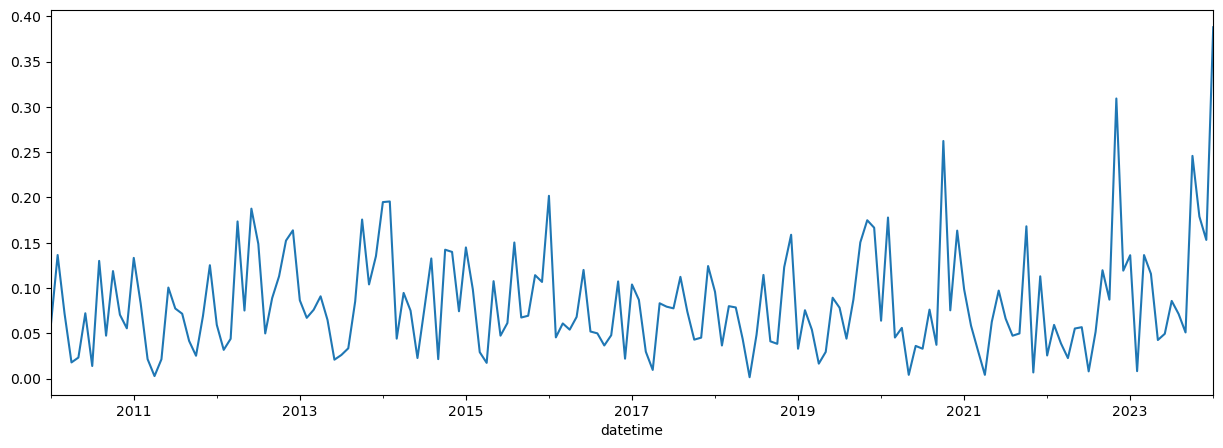

In [164]:
# plot the average precipitation by month and show months on x axis
brighton_df.resample('M').mean()['precip'].plot(figsize=(15, 5))